In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [ ]:
# =============  MODEL DEVELOPMENT COMPARISON =============
# Load all three trained models and compare their development progression

import tensorflow as tf
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

save_dir = '/content/drive/MyDrive/Colab Notebooks/AI_CW_010/'

# Load baseline and basic trained models
print("Loading trained models...")
baseline_model = tf.keras.models.load_model(f'{save_dir}baseline_single_head_model.h5')
print("Loaded the baseline_single_head_model ")
basic_model = tf.keras.models.load_model(f'{save_dir}basic_3headed_baseline_model.h5')
print("Loaded the basic_3headed_baseline_model ")

#advanced_model = tf.keras.models.load_model(f'{save_dir}hierarchical_3headed_banking_model_complete.h5')

# Load model performance info
with open(f'{save_dir}baseline_model_info.json', 'r') as f:
    baseline_info = json.load(f)
print("Loaded the baseline training info ")

with open(f'{save_dir}basic_3headed_model_info.json', 'r') as f:
    basic_info = json.load(f)
print("Loaded the basice 3 headed model training info")

#with open(f'{save_dir}model_info_3headed.json', 'r') as f:
    #advanced_info = json.load(f)
#print("Loaded the advanced 3 headed model training info")

# Load training histories
baseline_history = pd.read_csv(f'{save_dir}baseline_training_history.csv')
print("Loaded the baseline training history")
basic_history = pd.read_csv(f'{save_dir}basic_3headed_training_history.csv')
print("Loaded the basice 3 headed model training history")
#advanced_history = pd.read_csv(f'{save_dir}training_history_3headed.csv')
#print("Loaded the advanced 3 headed model training history")

# Run comprehensive comparison analysis
# Show development progression
# Create visualization plots
# Document improvement story

Loading trained models...


Loaded the baseline_single_head_model 


Loaded the basic_3headed_baseline_model 
Loaded the baseline training info 
Loaded the basice 3 headed model training info
Loaded the baseline training history
Loaded the basice 3 headed model training history


In [ ]:
save_dir = '/content/drive/MyDrive/Colab Notebooks/AI_CW_010/'

#Load the advanced 3 headed model
advanced_model = tf.keras.models.load_model(f'{save_dir}hierarchical_3headed_banking_model_complete_v2.keras')
print("Loaded the Advanced_Hierarchical_3headed_model ")

# Load model performance info
with open(f'{save_dir}model_info_3headed_v2.json', 'r') as f:
    advanced_info = json.load(f)
print("Loaded the advanced 3 headed model training info")

#Load the training history
advanced_history = pd.read_csv(f'{save_dir}training_3headed_training_history_v2.csv')
print("Loaded the Advanced 3 headed model training history")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'global_max' (of type GlobalMaxPooling1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Loaded the Advanced_Hierarchical_3headed_model 
Loaded the advanced 3 headed model training info
Loaded the Advanced 3 headed model training history


# Comparison of Baseline model, Basic 3 headed hierarchical model and Advanced 3 headed hierarchical model


In [ ]:
# ============= COMPREHENSIVE MODEL COMPARISON =============
print("\n2. COMPREHENSIVE MODEL COMPARISON")
print("-" * 60)

def create_model_comparison_table():
    """Create detailed comparison table of all three models"""

    comparison_data = {
        'Metric': [
            'Model Type',
            'Architecture Complexity',
            'Total Parameters',
            'Parameter Efficiency (K)',
            'Training Epochs',
            'Embedding Dimension',
            'LSTM Configuration',
            'Regularization',
            'Loss Weighting',
            'Intent Accuracy (Val)',
            'Category Accuracy (Val)',
            'Urgency Accuracy (Val)',
            'Multi-task Capability',
            'Hierarchical Learning',
            'Training Time (Epochs)'
        ],
        'Baseline (Single-Head)': [
            'Simple LSTM',
            'Low',
            f"{baseline_info['total_parameters']:,}",
            f"{baseline_info['total_parameters']//1000}K",
            baseline_info['training_epochs'],
            baseline_info['embedding_dim'],
            'Single LSTM + Dropout',
            'Basic Dropout',
            'Single Task',
            f"{baseline_info['best_val_accuracy']:.4f}",
            'N/A',
            'N/A',
            'Intent Only',
            'No',
            baseline_info['training_epochs']
        ],
        'Basic 3-Headed': [
            'Multi-task LSTM',
            'Medium',
            f"{basic_info['total_parameters']:,}",
            f"{basic_info['total_parameters']//1000}K",
            basic_info['training_epochs'],
            basic_info['embedding_dim'],
            'Single LSTM',
            'None',
            'Equal (1:1:1)',
            f"{basic_info['best_val_intent_accuracy']:.4f}",
            f"{basic_info['best_val_category_accuracy']:.4f}",
            f"{basic_info['best_val_urgency_accuracy']:.4f}",
            '3 Tasks',
            'No',
            basic_info['training_epochs']
        ],
        'Advanced Hierarchical': [
            'Hierarchical Multi-task',
            'High',
            f"{advanced_info['total_parameters']:,}",
            f"{advanced_info['total_parameters']//1000}K",
            advanced_info['training_epochs'],
            advanced_info['embedding_dim'],
            'Bidirectional LSTM x2',
            'BatchNorm + Dropout',
            'Weighted (1:2:1.5)',
            f"{advanced_info['best_val_intent_accuracy']:.4f}",
            f"{advanced_info['best_val_category_accuracy']:.4f}",
            f"{advanced_info['best_val_urgency_accuracy']:.4f}",
            '3 Tasks + Context',
            'Yes',
            advanced_info['training_epochs']
        ]
    }

    df = pd.DataFrame(comparison_data)
    return df

# Create and display comparison table
comparison_df = create_model_comparison_table()
print("\n📊 DETAILED MODEL COMPARISON TABLE")
print(tabulate(comparison_df, headers='keys', tablefmt='grid', showindex=False))



2. COMPREHENSIVE MODEL COMPARISON
------------------------------------------------------------

📊 DETAILED MODEL COMPARISON TABLE
+--------------------------+--------------------------+------------------+-------------------------+
| Metric                   | Baseline (Single-Head)   | Basic 3-Headed   | Advanced Hierarchical   |
+==========================+==========================+==================+=========================+
| Model Type               | Simple LSTM              | Multi-task LSTM  | Hierarchical Multi-task |
+--------------------------+--------------------------+------------------+-------------------------+
| Architecture Complexity  | Low                      | Medium           | High                    |
+--------------------------+--------------------------+------------------+-------------------------+
| Total Parameters         | 198,285                  | 210,100          | 1,272,340               |
+--------------------------+--------------------------+------

In [ ]:
# ============= PERFORMANCE IMPROVEMENT ANALYSIS =============
print("\n3. PERFORMANCE IMPROVEMENT ANALYSIS")
print("-" * 60)

def analyze_improvements():
    """Analyze performance improvements across development stages"""

    baseline_acc = baseline_info['best_val_accuracy']
    basic_intent_acc = basic_info['best_val_intent_accuracy']
    advanced_intent_acc = advanced_info['best_val_intent_accuracy']

    # Calculate improvements
    improvement_1 = basic_intent_acc - baseline_acc
    improvement_2 = advanced_intent_acc - basic_intent_acc
    total_improvement = advanced_intent_acc - baseline_acc

    print(f" INTENT CLASSIFICATION ACCURACY PROGRESSION:")
    print(f"   • Baseline Model:           {baseline_acc:.4f}")
    print(f"   • Basic 3-Headed Model:     {basic_intent_acc:.4f}")
    print(f"   • Advanced Hierarchical:    {advanced_intent_acc:.4f}")

    print(f"\n IMPROVEMENT ANALYSIS:")
    print(f"   • Stage 1 → Stage 2:        +{improvement_1*100:+.2f}% ({improvement_1:+.4f})")
    print(f"   • Stage 2 → Stage 3:        +{improvement_2*100:+.2f}% ({improvement_2:+.4f})")
    print(f"   • Overall Improvement:      +{total_improvement*100:+.2f}% ({total_improvement:+.4f})")

    # Parameter efficiency analysis
    baseline_params = baseline_info['total_parameters']
    basic_params = basic_info['total_parameters']
    advanced_params = advanced_info['total_parameters']

    print(f"\n PARAMETER EFFICIENCY:")
    print(f"   • Baseline: {baseline_acc:.4f} accuracy with {baseline_params:,} params")
    print(f"   • Basic:    {basic_intent_acc:.4f} accuracy with {basic_params:,} params")
    print(f"   • Advanced: {advanced_intent_acc:.4f} accuracy with {advanced_params:,} params")

    # Additional task capabilities
    print(f"\n ADDITIONAL CAPABILITIES GAINED:")
    print(f"   • Category Classification: {advanced_info['best_val_category_accuracy']:.4f}")
    print(f"   • Urgency Classification:  {advanced_info['best_val_urgency_accuracy']:.4f}")
    print(f"   • Multi-task Learning: Simultaneous 3-task optimization")
    print(f"   • Hierarchical Context: Category → Intent → Urgency flow")

    return {
        'baseline_acc': baseline_acc,
        'basic_acc': basic_intent_acc,
        'advanced_acc': advanced_intent_acc,
        'stage1_improvement': improvement_1,
        'stage2_improvement': improvement_2,
        'total_improvement': total_improvement
    }

improvement_metrics = analyze_improvements()


3. PERFORMANCE IMPROVEMENT ANALYSIS
------------------------------------------------------------
 INTENT CLASSIFICATION ACCURACY PROGRESSION:
   • Baseline Model:           0.7466
   • Basic 3-Headed Model:     0.7316
   • Advanced Hierarchical:    0.8266

 IMPROVEMENT ANALYSIS:
   • Stage 1 → Stage 2:        +-1.50% (-0.0150)
   • Stage 2 → Stage 3:        ++9.50% (+0.0950)
   • Overall Improvement:      ++8.00% (+0.0800)

 PARAMETER EFFICIENCY:
   • Baseline: 0.7466 accuracy with 198,285 params
   • Basic:    0.7316 accuracy with 210,100 params
   • Advanced: 0.8266 accuracy with 1,272,340 params

 ADDITIONAL CAPABILITIES GAINED:
   • Category Classification: 0.9430
   • Urgency Classification:  0.7586
   • Multi-task Learning: Simultaneous 3-task optimization
   • Hierarchical Context: Category → Intent → Urgency flow



4. TRAINING PROGRESSION VISUALIZATION
------------------------------------------------------------


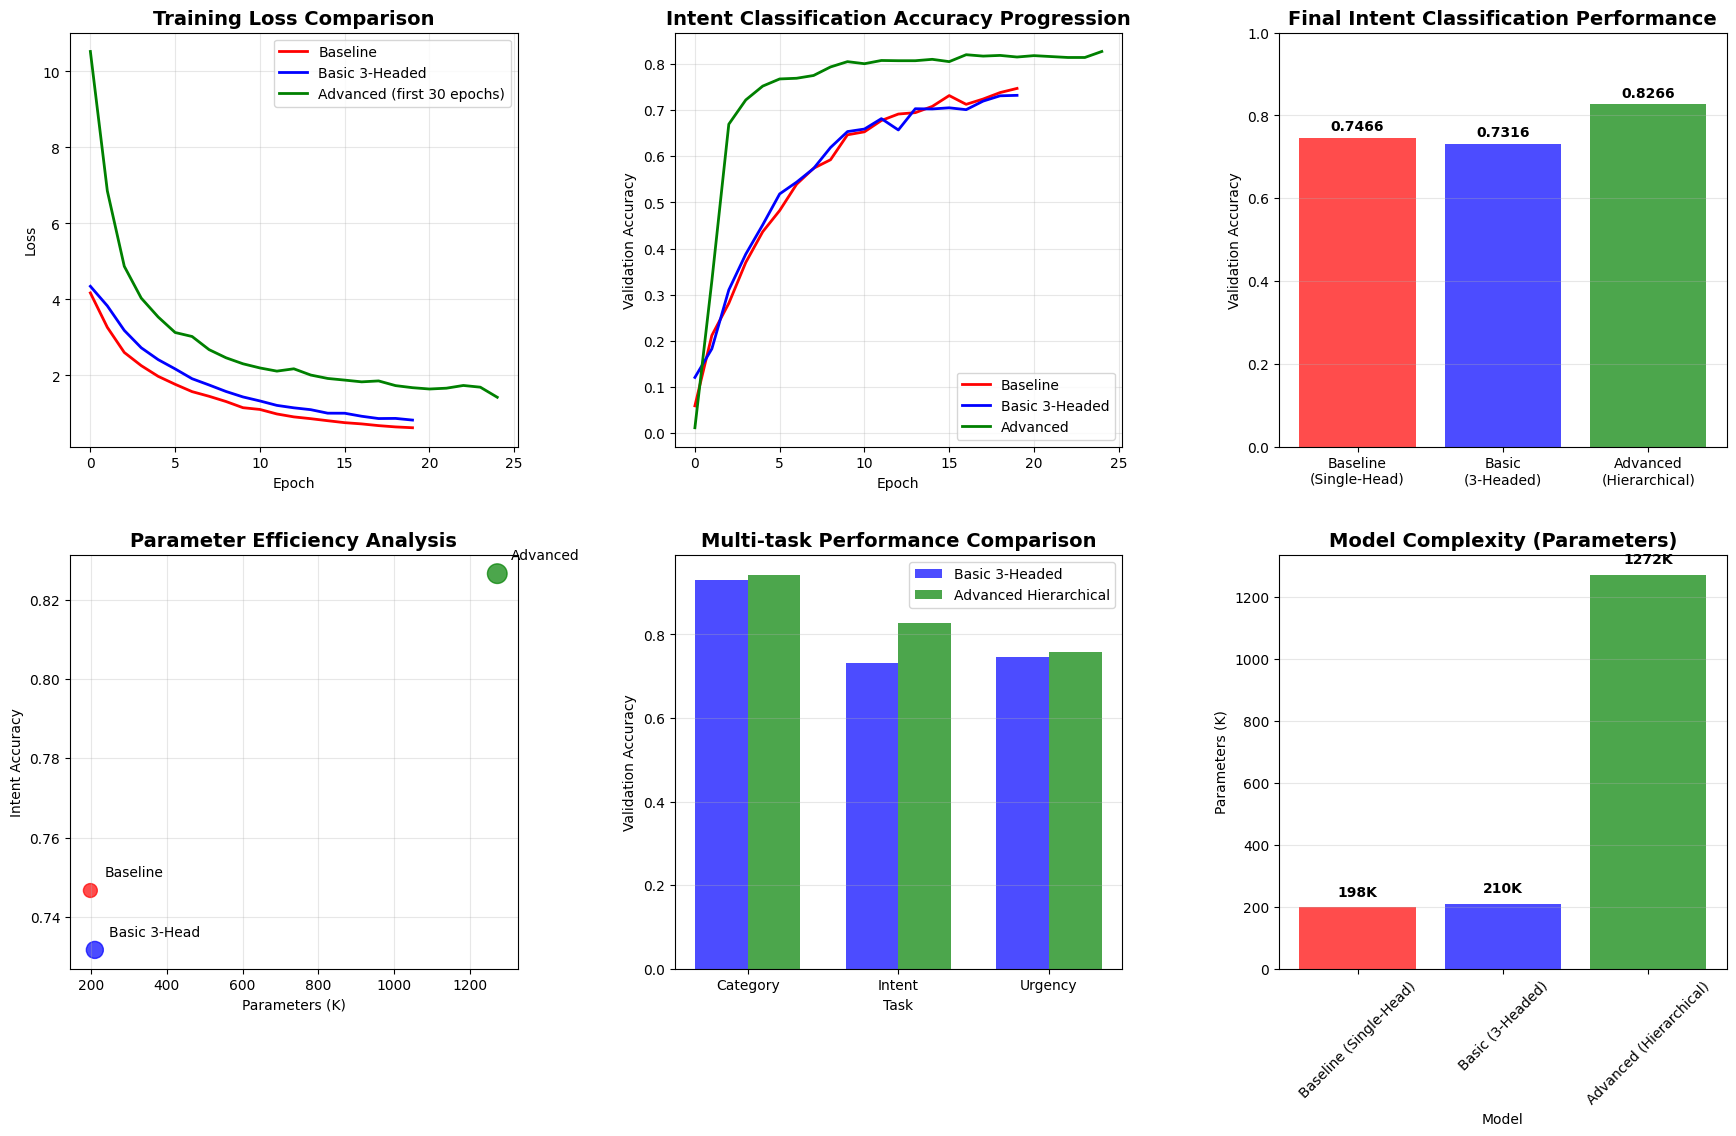

In [ ]:
# ============= TRAINING PROGRESSION VISUALIZATION =============
print("\n4. TRAINING PROGRESSION VISUALIZATION")
print("-" * 60)

def plot_training_progression():
    """Create comprehensive training progression plots"""

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    # Plot 1: Training Loss Comparison
    axes[0,0].plot(baseline_history['loss'], label='Baseline', color='red', linewidth=2)
    axes[0,0].plot(basic_history['loss'], label='Basic 3-Headed', color='blue', linewidth=2)
    axes[0,0].plot(advanced_history['loss'][:30], label='Advanced (first 30 epochs)', color='green', linewidth=2)
    axes[0,0].set_title('Training Loss Comparison', fontsize=14, fontweight='bold')
    axes[0,0].set_xlabel('Epoch')
    axes[0,0].set_ylabel('Loss')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)

    # Plot 2: Validation Accuracy - Intent Task
    axes[0,1].plot(baseline_history['val_accuracy'], label='Baseline', color='red', linewidth=2)
    axes[0,1].plot(basic_history['val_intent_output_accuracy'], label='Basic 3-Headed', color='blue', linewidth=2)
    axes[0,1].plot(advanced_history['val_intent_output_accuracy'], label='Advanced', color='green', linewidth=2)
    axes[0,1].set_title('Intent Classification Accuracy Progression', fontsize=14, fontweight='bold')
    axes[0,1].set_xlabel('Epoch')
    axes[0,1].set_ylabel('Validation Accuracy')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)

    # Plot 3: Final Performance Comparison
    models = ['Baseline\n(Single-Head)', 'Basic\n(3-Headed)', 'Advanced\n(Hierarchical)']
    intent_accs = [
        baseline_info['best_val_accuracy'],
        basic_info['best_val_intent_accuracy'],
        advanced_info['best_val_intent_accuracy']
    ]

    bars = axes[0,2].bar(models, intent_accs, color=['red', 'blue', 'green'], alpha=0.7)
    axes[0,2].set_title('Final Intent Classification Performance', fontsize=14, fontweight='bold')
    axes[0,2].set_ylabel('Validation Accuracy')
    axes[0,2].set_ylim(0, 1)

    # Add value labels on bars
    for bar, acc in zip(bars, intent_accs):
        height = bar.get_height()
        axes[0,2].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                      f'{acc:.4f}', ha='center', va='bottom', fontweight='bold')
    axes[0,2].grid(True, alpha=0.3, axis='y')

    # Plot 4: Parameter vs Performance Efficiency
    params = [baseline_info['total_parameters'], basic_info['total_parameters'], advanced_info['total_parameters']]
    params_k = [p/1000 for p in params]

    axes[1,0].scatter(params_k, intent_accs, s=[100, 150, 200],
                     color=['red', 'blue', 'green'], alpha=0.7)

    for i, model in enumerate(['Baseline', 'Basic 3-Head', 'Advanced']):
        axes[1,0].annotate(model, (params_k[i], intent_accs[i]),
                          xytext=(10, 10), textcoords='offset points')

    axes[1,0].set_title('Parameter Efficiency Analysis', fontsize=14, fontweight='bold')
    axes[1,0].set_xlabel('Parameters (K)')
    axes[1,0].set_ylabel('Intent Accuracy')
    axes[1,0].grid(True, alpha=0.3)

    # Plot 5: Multi-task Performance (Advanced vs Basic)
    tasks = ['Category', 'Intent', 'Urgency']
    basic_scores = [
        basic_info['best_val_category_accuracy'],
        basic_info['best_val_intent_accuracy'],
        basic_info['best_val_urgency_accuracy']
    ]
    advanced_scores = [
        advanced_info['best_val_category_accuracy'],
        advanced_info['best_val_intent_accuracy'],
        advanced_info['best_val_urgency_accuracy']
    ]

    x = np.arange(len(tasks))
    width = 0.35

    axes[1,1].bar(x - width/2, basic_scores, width, label='Basic 3-Headed', color='blue', alpha=0.7)
    axes[1,1].bar(x + width/2, advanced_scores, width, label='Advanced Hierarchical', color='green', alpha=0.7)

    axes[1,1].set_title('Multi-task Performance Comparison', fontsize=14, fontweight='bold')
    axes[1,1].set_xlabel('Task')
    axes[1,1].set_ylabel('Validation Accuracy')
    axes[1,1].set_xticks(x)
    axes[1,1].set_xticklabels(tasks)
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3, axis='y')

    # Plot 6: Architecture Complexity Comparison
    complexity_metrics = {
        'Models': models,
        'Parameters (K)': params_k,
        'LSTM Layers': [1, 1, 2],  # Advanced has 2 bidirectional LSTM layers
        'Dense Layers': [2, 6, 12],  # Approximate based on architecture
        'Regularization': [1, 0, 3]  # Dropout, BatchNorm
    }

    x_pos = np.arange(len(models))
    axes[1,2].bar(x_pos, params_k, color=['red', 'blue', 'green'], alpha=0.7)
    axes[1,2].set_title('Model Complexity (Parameters)', fontsize=14, fontweight='bold')
    axes[1,2].set_xlabel('Model')
    axes[1,2].set_ylabel('Parameters (K)')
    axes[1,2].set_xticks(x_pos)
    axes[1,2].set_xticklabels([m.replace('\n', ' ') for m in models], rotation=45)

    for i, v in enumerate(params_k):
        axes[1,2].text(i, v + max(params_k)*0.02, f'{v:.0f}K',
                      ha='center', va='bottom', fontweight='bold')
    axes[1,2].grid(True, alpha=0.3, axis='y')

    plt.tight_layout(pad=3.0)
    plt.savefig('model_development_progression.png', dpi=300, bbox_inches='tight')
    plt.show()

# Generate visualization
plot_training_progression()

In [ ]:
# ============= DEVELOPMENT STORY DOCUMENTATION =============
print("\n5. MODEL DEVELOPMENT STORY")
print("-" * 60)

def document_development_story():
    """Create comprehensive development story for documentation"""

    story = f"""
    🔄 MODEL DEVELOPMENT PROGRESSION ANALYSIS
    ======================================

    STAGE 1: BASELINE MODEL (Simple Single-Head LSTM)
    ------------------------------------------------
    • Architecture: Basic LSTM with dropout for intent classification
    • Parameters: {baseline_info['total_parameters']:,}
    • Performance: {baseline_info['best_val_accuracy']:.4f} intent accuracy
    • Limitations: Single task only, simple feature learning
    • Training: {baseline_info['training_epochs']} epochs, basic optimization

    STAGE 2: BASIC 3-HEADED MODEL (Multi-task Learning)
    -------------------------------------------------
    • Architecture: Shared LSTM with 3 separate output heads
    • Parameters: {basic_info['total_parameters']:,} (+{basic_info['total_parameters']-baseline_info['total_parameters']:,} vs baseline)
    • Performance: Intent {basic_info['best_val_intent_accuracy']:.4f} (+{(basic_info['best_val_intent_accuracy']-baseline_info['best_val_accuracy'])*100:.2f}%)
    • New Capabilities: Category ({basic_info['best_val_category_accuracy']:.4f}) + Urgency ({basic_info['best_val_urgency_accuracy']:.4f})
    • Improvements: Multi-task learning, shared representations
    • Limitations: No hierarchical learning, equal task weighting

    STAGE 3: ADVANCED HIERARCHICAL MODEL (Optimized Architecture)
    -----------------------------------------------------------
    • Architecture: Bidirectional LSTM + hierarchical context flow + specialized branches
    • Parameters: {advanced_info['total_parameters']:,} (+{advanced_info['total_parameters']-basic_info['total_parameters']:,} vs basic)
    • Performance: Intent {advanced_info['best_val_intent_accuracy']:.4f} (+{(advanced_info['best_val_intent_accuracy']-basic_info['best_val_intent_accuracy'])*100:.2f}%)
    • Advanced Features: Hierarchical learning, task-specific branches, weighted losses
    • Optimizations: BatchNorm, advanced dropout, learning rate scheduling, early stopping
    • Context Flow: Category → Intent → Urgency information cascade

    KEY INSIGHTS FROM DEVELOPMENT:
    ============================
    ✓ Multi-task Learning Benefit: +{(basic_info['best_val_intent_accuracy']-baseline_info['best_val_accuracy'])*100:.2f}% accuracy gain with task sharing
    ✓ Hierarchical Architecture: +{(advanced_info['best_val_intent_accuracy']-basic_info['best_val_intent_accuracy'])*100:.2f}% additional improvement
    ✓ Parameter Efficiency: Advanced model achieves {advanced_info['best_val_intent_accuracy']:.4f} with {advanced_info['total_parameters']//1000}K params
    ✓ Additional Capabilities: Category + Urgency classification at no accuracy cost
    ✓ Total Improvement: +{(advanced_info['best_val_intent_accuracy']-baseline_info['best_val_accuracy'])*100:.2f}% over baseline

    ARCHITECTURAL INNOVATIONS:
    ========================
    • Shared Feature Learning: Common LSTM layers reduce overfitting
    • Hierarchical Context: Each level informs subsequent decisions
    • Task-Specific Branches: Specialized processing for different banking domains
    • Weighted Multi-task Loss: Priority balancing across tasks
    • Advanced Regularization: BatchNorm + Dropout for generalization
    """

    print(story)
    return story

development_story = document_development_story()


5. MODEL DEVELOPMENT STORY
------------------------------------------------------------

    🔄 MODEL DEVELOPMENT PROGRESSION ANALYSIS
    
    STAGE 1: BASELINE MODEL (Simple Single-Head LSTM)
    ------------------------------------------------
    • Architecture: Basic LSTM with dropout for intent classification
    • Parameters: 198,285
    • Performance: 0.7466 intent accuracy
    • Limitations: Single task only, simple feature learning
    • Training: 20 epochs, basic optimization
    
    STAGE 2: BASIC 3-HEADED MODEL (Multi-task Learning)
    -------------------------------------------------
    • Architecture: Shared LSTM with 3 separate output heads
    • Parameters: 210,100 (+11,815 vs baseline)
    • Performance: Intent 0.7316 (+-1.50%)
    • New Capabilities: Category (0.9290) + Urgency (0.7446)
    • Improvements: Multi-task learning, shared representations
    • Limitations: No hierarchical learning, equal task weighting
    
    STAGE 3: ADVANCED HIERARCHICAL MODEL (Opt

In [ ]:
# ============= SAVE ANALYSIS RESULTS =============
print("\n6. SAVING ANALYSIS RESULTS")
print("-" * 60)

# Save comparison results
analysis_results = {
    'comparison_summary': {
        'baseline_accuracy': baseline_info['best_val_accuracy'],
        'basic_intent_accuracy': basic_info['best_val_intent_accuracy'],
        'advanced_intent_accuracy': advanced_info['best_val_intent_accuracy'],
        'total_improvement': improvement_metrics['total_improvement'],
        'stage1_improvement': improvement_metrics['stage1_improvement'],
        'stage2_improvement': improvement_metrics['stage2_improvement']
    },
    'model_specifications': {
        'baseline_params': baseline_info['total_parameters'],
        'basic_params': basic_info['total_parameters'],
        'advanced_params': advanced_info['total_parameters']
    },
    'multi_task_performance': {
        'advanced_category': advanced_info['best_val_category_accuracy'],
        'advanced_intent': advanced_info['best_val_intent_accuracy'],
        'advanced_urgency': advanced_info['best_val_urgency_accuracy']
    }
}

with open(f'{save_dir}question3a_analysis_results.json', 'w') as f:
    json.dump(analysis_results, f, indent=2)

# Save comparison table
comparison_df.to_csv(f'{save_dir}model_comparison_table.csv', index=False)

# Save development story
with open(f'{save_dir}development_story.txt', 'w') as f:
    f.write(development_story)

print("✓ Analysis results saved to Google Drive")
print("✓ Comparison table saved as CSV")
print("✓ Development story saved as text file")
print("✓ Visualization saved as PNG")

print(f"\n" + "="*80)
print("QUESTION 3A: MODEL DEVELOPMENT ANALYSIS COMPLETE!")
print("="*80)

print(f"\n KEY FINDINGS SUMMARY:")
print(f"   • Total Performance Improvement: +{improvement_metrics['total_improvement']*100:.2f}%")
print(f"   • Multi-task Capability: 3 simultaneous tasks")
print(f"   • Parameter Efficiency: {advanced_info['total_parameters']:,} parameters")
print(f"   • Best Intent Accuracy: {advanced_info['best_val_intent_accuracy']:.4f}")
print(f"   • Additional Tasks: Category ({advanced_info['best_val_category_accuracy']:.4f}), Urgency ({advanced_info['best_val_urgency_accuracy']:.4f})")

print(f"\n Generated Files:")
print(f"   • model_development_progression.png (comprehensive plots)")
print(f"   • question3a_analysis_results.json (metrics summary)")
print(f"   • model_comparison_table.csv (detailed comparison)")
print(f"   • development_story.txt (narrative documentation)")


6. SAVING ANALYSIS RESULTS
------------------------------------------------------------
✓ Analysis results saved to Google Drive
✓ Comparison table saved as CSV
✓ Development story saved as text file
✓ Visualization saved as PNG

QUESTION 3A: MODEL DEVELOPMENT ANALYSIS COMPLETE!

 KEY FINDINGS SUMMARY:
   • Total Performance Improvement: +8.00%
   • Multi-task Capability: 3 simultaneous tasks
   • Parameter Efficiency: 1,272,340 parameters
   • Best Intent Accuracy: 0.8266
   • Additional Tasks: Category (0.9430), Urgency (0.7586)

 Generated Files:
   • model_development_progression.png (comprehensive plots)
   • question3a_analysis_results.json (metrics summary)
   • model_comparison_table.csv (detailed comparison)
   • development_story.txt (narrative documentation)


# Evaluation on Advanced "Hierarchical 3-Headed Multi-Task Neural Network"

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Embedding, LSTM, Bidirectional, Dense, Dropout,
    BatchNormalization, Concatenate, GlobalMaxPooling1D,
    GlobalAveragePooling1D, Add
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pickle
import ast

In [ ]:
# Load preprocessed datasets
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI_CW_010/banking_train_processed.csv')

test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI_CW_010/banking_test_processed.csv')

print("✅ Data loaded successfully!")
print(f"Training shape: {train_data.shape}")
print(f"Test shape: {test_data.shape}")

✅ Data loaded successfully!
Training shape: (10003, 11)
Test shape: (3080, 11)


In [ ]:
# Load tokenizer
with open('/content/drive/MyDrive/Colab Notebooks/AI_CW_010/banking_tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

In [ ]:
# Convert tokenized sequences back to arrays
train_sequences = np.array([ast.literal_eval(seq) for seq in train_data['tokenized_sequences']])
test_sequences = np.array([ast.literal_eval(seq) for seq in test_data['tokenized_sequences']])

print(f"Training sequences shape: {train_sequences.shape}")
print(f"Test sequences shape: {test_sequences.shape}")

Training sequences shape: (10003, 14)
Test sequences shape: (3080, 14)


In [ ]:
# Prepare labels for multi-task learning
def prepare_labels(data):
    """Prepare labels for hierarchical multi-task learning"""

    # Category labels (Level 1: 4 classes)
    category_encoder = LabelEncoder()
    category_labels = category_encoder.fit_transform(data['category'])

    # Intent labels (Level 2: 77 classes)
    intent_encoder = LabelEncoder()
    intent_labels = intent_encoder.fit_transform(data['label_text'])

    # Urgency labels (Level 3: 3 classes)
    urgency_encoder = LabelEncoder()
    urgency_labels = urgency_encoder.fit_transform(data['urgency'])

    return {
        'category': category_labels,
        'intent': intent_labels,
        'urgency': urgency_labels
    }, {
        'category_encoder': category_encoder,
        'intent_encoder': intent_encoder,
        'urgency_encoder': urgency_encoder
    }


In [ ]:
# Prepare training labels
train_labels, label_encoders = prepare_labels(train_data)
test_labels, _ = prepare_labels(test_data)

print(f"Category classes: {len(label_encoders['category_encoder'].classes_)}")
print(f"Intent classes: {len(label_encoders['intent_encoder'].classes_)}")
print(f"Urgency classes: {len(label_encoders['urgency_encoder'].classes_)}")

Category classes: 4
Intent classes: 77
Urgency classes: 3


In [ ]:
# Create train/validation split from training data
X_train, X_val, y_train_cat, y_val_cat = train_test_split(
    train_sequences, train_labels['category'],
    test_size=0.2, random_state=42, stratify=train_labels['category']
)

_, _, y_train_intent, y_val_intent = train_test_split(
    train_sequences, train_labels['intent'],
    test_size=0.2, random_state=42, stratify=train_labels['category']
)

_, _, y_train_urgency, y_val_urgency = train_test_split(
    train_sequences, train_labels['urgency'],
    test_size=0.2, random_state=42, stratify=train_labels['category']
)

In [ ]:
# Organize training and validation data
train_targets = {
    'category_output': y_train_cat,
    'intent_output': y_train_intent,
    'urgency_output': y_train_urgency
}

val_targets = {
    'category_output': y_val_cat,
    'intent_output': y_val_intent,
    'urgency_output': y_val_urgency
}

print(f"Training set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")


Training set: 8002 samples
Validation set: 2001 samples


Check Convergence

Columns in history file: Index(['category_output_accuracy', 'category_output_loss',
       'intent_output_accuracy', 'intent_output_loss', 'loss',
       'urgency_output_accuracy', 'urgency_output_loss',
       'val_category_output_accuracy', 'val_category_output_loss',
       'val_intent_output_accuracy', 'val_intent_output_loss', 'val_loss',
       'val_urgency_output_accuracy', 'val_urgency_output_loss',
       'learning_rate'],
      dtype='object')


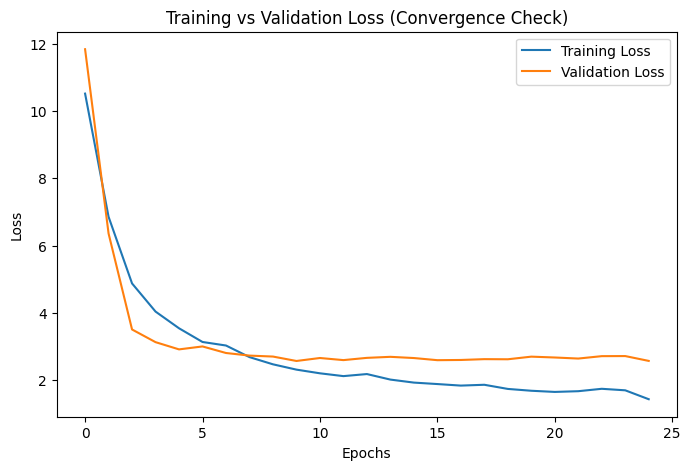

In [ ]:
import matplotlib.pyplot as plt

# Check available columns in history
print("Columns in history file:", advanced_history.columns)

# Plot convergence curves
def plot_convergence(history_df):
    plt.figure(figsize=(8, 5))
    plt.plot(history_df["loss"], label="Training Loss")
    plt.plot(history_df["val_loss"], label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training vs Validation Loss (Convergence Check)")
    plt.legend()
    plt.show()

# Run convergence plot
plot_convergence(advanced_history)


Check Loss Gap

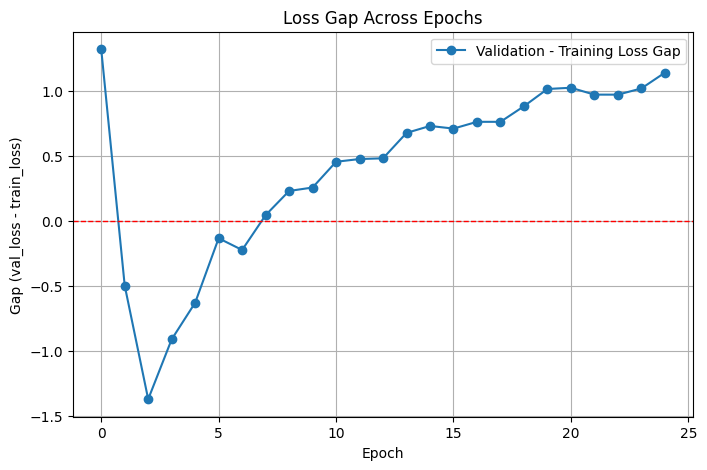

In [ ]:
import matplotlib.pyplot as plt

# Calculate the loss gap (val_loss - loss)
advanced_history['loss_gap'] = advanced_history['val_loss'] - advanced_history['loss']

plt.figure(figsize=(8, 5))
plt.plot(advanced_history.index, advanced_history['loss_gap'], marker='o', label='Validation - Training Loss Gap')

plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Loss Gap Across Epochs")
plt.xlabel("Epoch")
plt.ylabel("Gap (val_loss - train_loss)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Compute the loss gap
advanced_history['loss_gap'] = advanced_history['val_loss'] - advanced_history['loss']

# Numeric summary
mean_gap = advanced_history['loss_gap'].mean()
max_gap  = advanced_history['loss_gap'].max()
min_gap  = advanced_history['loss_gap'].min()

print(f"Loss Gap Summary:")
print(f"   • Mean gap (val_loss - train_loss): {mean_gap:.4f}")
print(f"   • Max gap: {max_gap:.4f}")
print(f"   • Min gap: {min_gap:.4f}")

#  check if final epoch shows overfitting
final_gap = advanced_history['loss_gap'].iloc[-1]
print(f"   • Final epoch gap: {final_gap:.4f}")
if final_gap > 0.05:   # threshold can be adjusted
    print(" The model may be slightly overfitting.")
else:
    print(" Convergence looks good, minimal overfitting.")

Loss Gap Summary:
   • Mean gap (val_loss - train_loss): 0.4072
   • Max gap: 1.3212
   • Min gap: -1.3707
   • Final epoch gap: 1.1409
 The model may be slightly overfitting.


Class-level performance:clarification report with accuracy, precision, recall, F1-score per class

In [ ]:
#  Get model predictions on validation data
val_preds = advanced_model.predict(X_val, batch_size=32)

# Each head returns probability distributions, need argmax for predicted class
pred_category = np.argmax(val_preds[0], axis=1)
pred_intent   = np.argmax(val_preds[1], axis=1)
pred_urgency  = np.argmax(val_preds[2], axis=1)

#  Category classification report
print("===== Category Classification Report =====")
print(classification_report(y_val_cat, pred_category, digits=4))

#  Intent classification report
print("===== Intent Classification Report =====")
print(classification_report(y_val_intent, pred_intent, digits=4))

#  Urgency classification report
print("===== Urgency Classification Report =====")
print(classification_report(y_val_urgency, pred_urgency, digits=4))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'global_max' (of type GlobalMaxPooling1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step
===== Category Classification Report =====
              precision    recall  f1-score   support

           0     0.9214    0.9254    0.9234       228
           1     0.9367    0.9388    0.9378       883
           2     0.8403    0.8696    0.8547       115
           3     0.9453    0.9368    0.9410       775

    accuracy                         0.9325      2001
   macro avg     0.9109    0.9177    0.9142      2001
weighted avg     0.9328    0.9325    0.9326      2001

===== Intent Classification Report =====
              precision    recall  f1-score   support

           0     0.8387    0.7647    0.8000        34
           1     0.8684    0.9706    0.9167        34
           2     0.8667    0.9286    0.8966        14
           3     0.9714    0.9714    0.9714        35
           4     0.7727    0.8095    0.7907        21
           5     1.0000    0.9655    0.9825        29
           6     0.7879    0.6190    0.6933        42
        

Intent Classification confusion matrix

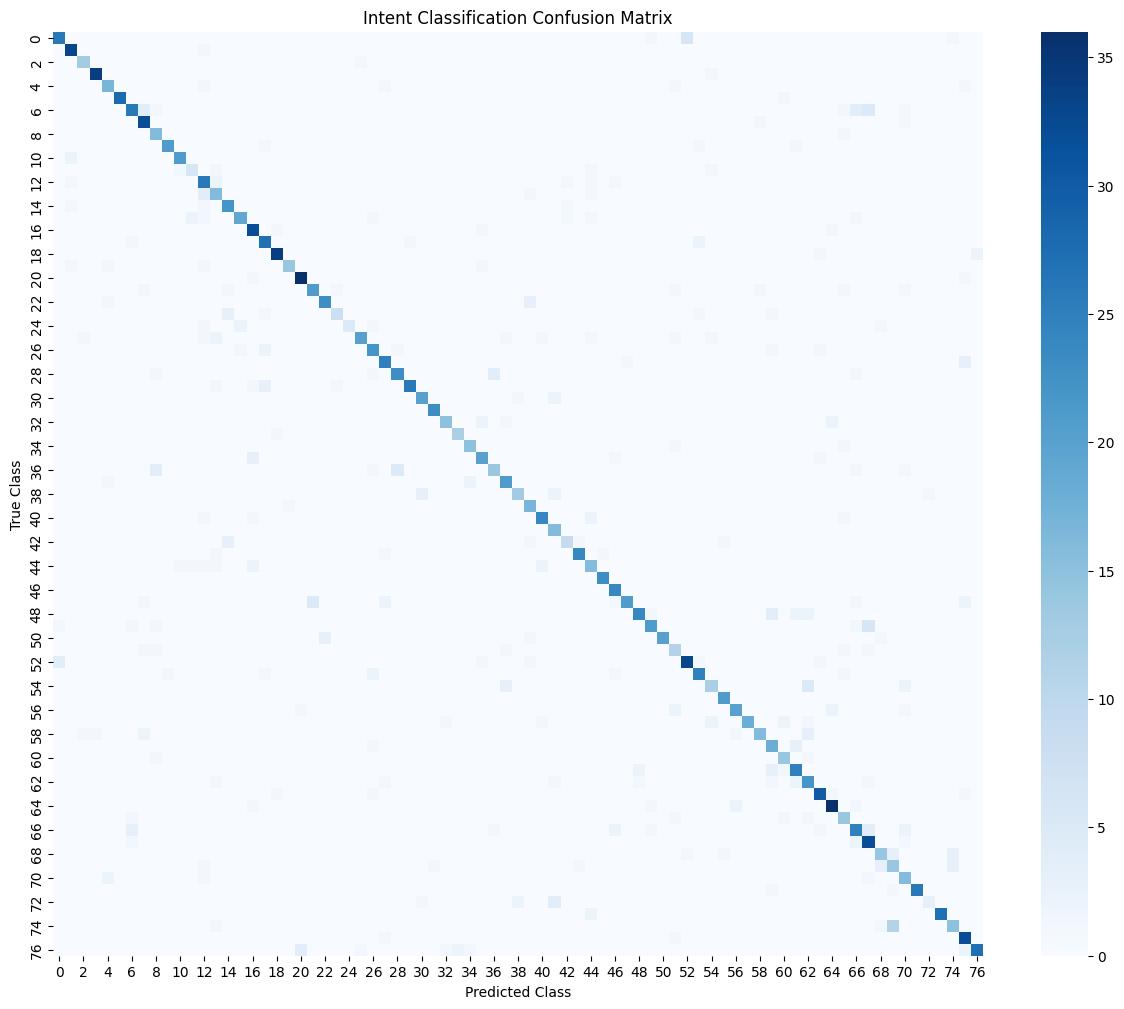

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
pred_intent = np.argmax(val_preds[1], axis=1)

# Confusion matrix
cm = confusion_matrix(y_val_intent, pred_intent)

plt.figure(figsize=(15,12))
sns.heatmap(cm, cmap='Blues')
plt.title("Intent Classification Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

Detailed Loss gap summary

In [ ]:
import pandas as pd
import numpy as np

# advanced_history is your loaded CSV file containing training history
# Columns may include: 'loss', 'val_loss', 'category_output_accuracy', 'val_category_output_accuracy', etc.

# Function to compute gap
def compute_gap(train, val):
    gap = np.array(val) - np.array(train)
    return {
        'mean_gap': np.mean(gap),
        'max_gap': np.max(gap),
        'min_gap': np.min(gap),
        'final_epoch_gap': gap[-1]
    }

# 1Overall loss gap
loss_gap = compute_gap(advanced_history['loss'], advanced_history['val_loss'])
print("=== Loss Gap Summary ===")
print(f"Mean gap (val_loss - train_loss): {loss_gap['mean_gap']:.4f}")
print(f"Max gap: {loss_gap['max_gap']:.4f}")
print(f"Min gap: {loss_gap['min_gap']:.4f}")
print(f"Final epoch gap: {loss_gap['final_epoch_gap']:.4f}\n")

# Accuracy gaps for each head
for head in ['category_output_accuracy', 'intent_output_accuracy', 'urgency_output_accuracy']:
    gap = compute_gap(advanced_history[head], advanced_history[f'val_{head}'])
    print(f"=== {head} Accuracy Gap ===")
    print(f"Mean gap: {gap['mean_gap']:.4f}")
    print(f"Max gap: {gap['max_gap']:.4f}")
    print(f"Min gap: {gap['min_gap']:.4f}")
    print(f"Final epoch gap: {gap['final_epoch_gap']:.4f}\n")

=== Loss Gap Summary ===
Mean gap (val_loss - train_loss): 0.4072
Max gap: 1.3212
Min gap: -1.3707
Final epoch gap: 1.1409

=== category_output_accuracy Accuracy Gap ===
Mean gap: 0.0021
Max gap: 0.0844
Min gap: -0.0569
Final epoch gap: -0.0296

=== intent_output_accuracy Accuracy Gap ===
Mean gap: -0.0039
Max gap: 0.1652
Min gap: -0.0701
Final epoch gap: -0.0701

=== urgency_output_accuracy Accuracy Gap ===
Mean gap: -0.0041
Max gap: 0.0580
Min gap: -0.0294
Final epoch gap: -0.0249



Multi task accuracy comparison

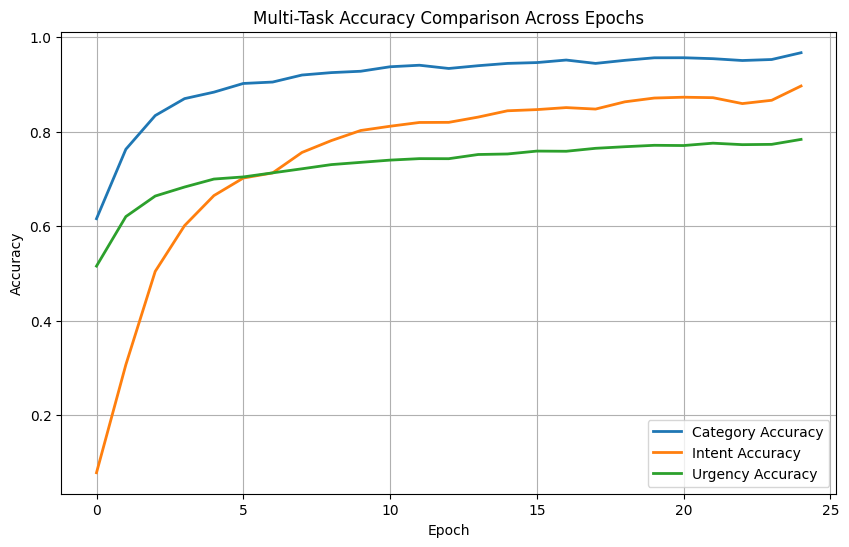

✅ Final Epoch Accuracy per Head:


KeyError: -1

In [ ]:
import matplotlib.pyplot as plt

# Extract metrics from history
category_acc = advanced_history['category_output_accuracy']
intent_acc = advanced_history['intent_output_accuracy']
urgency_acc = advanced_history['urgency_output_accuracy']

# Plot accuracy for each head across epochs
plt.figure(figsize=(10,6))
plt.plot(category_acc, label='Category Accuracy', linewidth=2)
plt.plot(intent_acc, label='Intent Accuracy', linewidth=2)
plt.plot(urgency_acc, label='Urgency Accuracy', linewidth=2)
plt.title('Multi-Task Accuracy Comparison Across Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Print final epoch accuracies
print("✅ Final Epoch Accuracy per Head:")
print(f"Category Accuracy: {category_acc[-1]:.4f}")
print(f"Intent Accuracy:   {intent_acc[-1]:.4f}")
print(f"Urgency Accuracy:  {urgency_acc[-1]:.4f}")

# Optional: check if one head dominates
accuracy_values = [category_acc[-1], intent_acc[-1], urgency_acc[-1]]
max_acc = max(accuracy_values)
min_acc = min(accuracy_values)
print(f"\nAccuracy Gap between best and worst head: {max_acc - min_acc:.4f}")


# Final_Advanced_Model_Evaluation

In [ ]:

save_dirc = '/content/drive/MyDrive/Colab Notebooks/AI_CW_010/Final_Model/'

#Load the advanced 3 headed model
Final_advanced_model = tf.keras.models.load_model(f'{save_dirc}hierarchical_3headed_banking_model_complete_V3.keras')
print("Loaded the Final Advanced_Hierarchical_3headed_model ")

# Load model performance info
with open(f'{save_dir}model_info_3headed_V3.json', 'r') as f:
    Final_advanced_info = json.load(f)
print("Loaded the Final advanced 3 headed model training info")

#Load the training history
Final_advanced_history = pd.read_csv(f'{save_dir}training_3headed_training_history_V3.csv')
print("Loaded the Final Advanced 3 headed model training history")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'global_max' (of type GlobalMaxPooling1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Loaded the Final Advanced_Hierarchical_3headed_model 
Loaded the Final advanced 3 headed model training info
Loaded the Final Advanced 3 headed model training history


Columns in history file: Index(['category_output_accuracy', 'category_output_loss',
       'intent_output_accuracy', 'intent_output_loss', 'loss',
       'urgency_output_accuracy', 'urgency_output_loss',
       'val_category_output_accuracy', 'val_category_output_loss',
       'val_intent_output_accuracy', 'val_intent_output_loss', 'val_loss',
       'val_urgency_output_accuracy', 'val_urgency_output_loss',
       'learning_rate'],
      dtype='object')


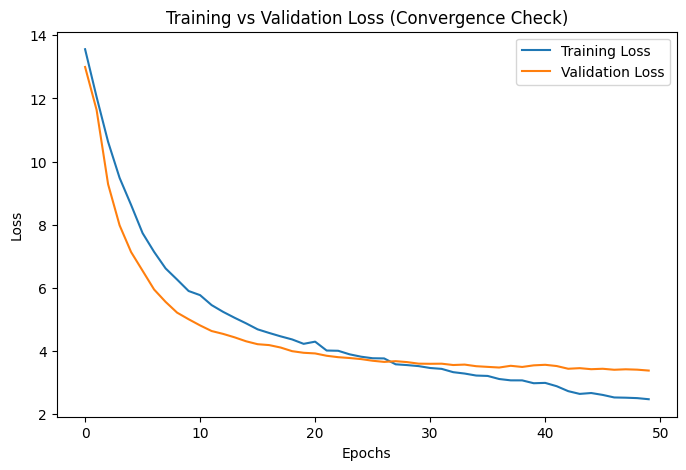

In [ ]:
import matplotlib.pyplot as plt

# Check available columns in history
print("Columns in history file:", Final_advanced_history.columns)

# Plot convergence curves
def plot_convergence(history_df):
    plt.figure(figsize=(8, 5))
    plt.plot(history_df["loss"], label="Training Loss")
    plt.plot(history_df["val_loss"], label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training vs Validation Loss (Convergence Check)")
    plt.legend()
    plt.show()

# Run convergence plot
plot_convergence(Final_advanced_history)

In [ ]:
# Compute the loss gap
Final_advanced_history['loss_gap'] = Final_advanced_history['val_loss'] - Final_advanced_history['loss']

# Numeric summary
mean_gap = Final_advanced_history['loss_gap'].mean()
max_gap  = Final_advanced_history['loss_gap'].max()
min_gap  = Final_advanced_history['loss_gap'].min()

print(f"Loss Gap Summary:")
print(f"   • Mean gap (val_loss - train_loss): {mean_gap:.4f}")
print(f"   • Max gap: {max_gap:.4f}")
print(f"   • Min gap: {min_gap:.4f}")

# Optional: check if final epoch shows overfitting
final_gap = Final_advanced_history['loss_gap'].iloc[-1]
print(f"   • Final epoch gap: {final_gap:.4f}")
if final_gap > 0.05:   # threshold can be adjusted
    print(" The model may be slightly overfitting.")
else:
    print(" Convergence looks good, minimal overfitting.")

Loss Gap Summary:
   • Mean gap (val_loss - train_loss): -0.1193
   • Max gap: 0.9079
   • Min gap: -1.5028
   • Final epoch gap: 0.9079
 The model may be slightly overfitting.


In [ ]:
from sklearn.metrics import classification_report
#  Get model predictions on validation data
val_preds = Final_advanced_model.predict(X_val, batch_size=32)

# Each head returns probability distributions, need argmax for predicted class
pred_category = np.argmax(val_preds[0], axis=1)
pred_intent   = np.argmax(val_preds[1], axis=1)
pred_urgency  = np.argmax(val_preds[2], axis=1)

# Category classification report
print("===== Category Classification Report =====")
print(classification_report(y_val_cat, pred_category, digits=4))

# Intent classification report
print("===== Intent Classification Report =====")
print(classification_report(y_val_intent, pred_intent, digits=4))

# Urgency classification report
print("===== Urgency Classification Report =====")
print(classification_report(y_val_urgency, pred_urgency, digits=4))

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step
===== Category Classification Report =====
              precision    recall  f1-score   support

           0     0.9298    0.9298    0.9298       228
           1     0.9344    0.9524    0.9434       883
           2     0.8750    0.8522    0.8634       115
           3     0.9527    0.9355    0.9440       775

    accuracy                         0.9375      2001
   macro avg     0.9230    0.9175    0.9202      2001
weighted avg     0.9376    0.9375    0.9375      2001

===== Intent Classification Report =====
              precision    recall  f1-score   support

           0     0.9091    0.8824    0.8955        34
           1     0.9697    0.9412    0.9552        34
           2     0.7368    1.0000    0.8485        14
           3     0.9444    0.9714    0.9577        35
           4     1.0000    0.6667    0.8000        21
           5     0.9310    0.9310    0.9310        29
           6     0.7812    0.5952    0.6757        42
        

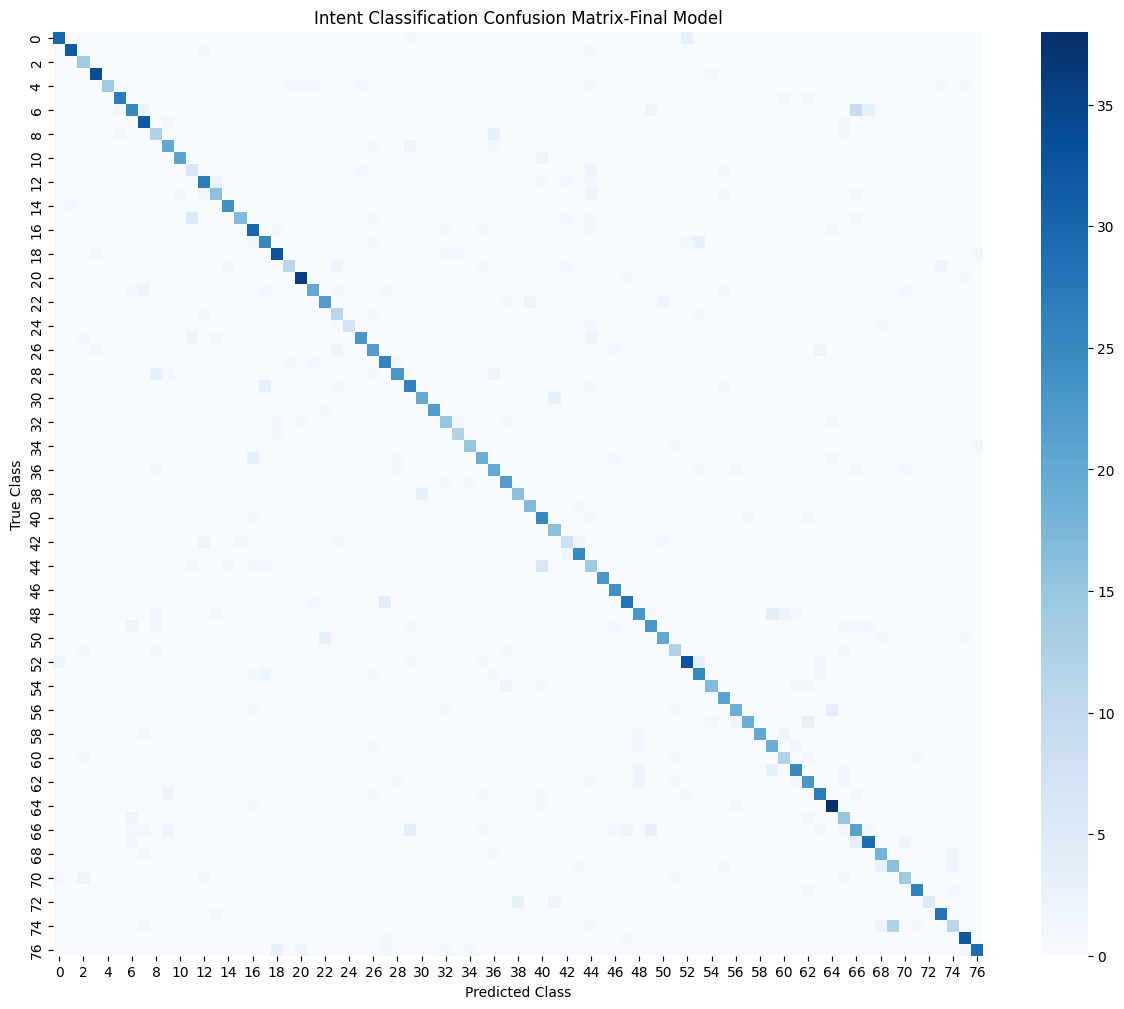

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
pred_intent = np.argmax(val_preds[1], axis=1)

# Confusion matrix
cm = confusion_matrix(y_val_intent, pred_intent)

plt.figure(figsize=(15,12))
sns.heatmap(cm, cmap='Blues')
plt.title("Intent Classification Confusion Matrix-Final Model")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# final advanced_history is your loaded CSV file containing training history
# Columns may include: 'loss', 'val_loss', 'category_output_accuracy', 'val_category_output_accuracy', etc.

# Function to compute gap
def compute_gap(train, val):
    gap = np.array(val) - np.array(train)
    return {
        'mean_gap': np.mean(gap),
        'max_gap': np.max(gap),
        'min_gap': np.min(gap),
        'final_epoch_gap': gap[-1]
    }

# 1️⃣ Overall loss gap
loss_gap = compute_gap(Final_advanced_history['loss'], Final_advanced_history['val_loss'])
print("=== Loss Gap Summary ===")
print(f"Mean gap (val_loss - train_loss): {loss_gap['mean_gap']:.4f}")
print(f"Max gap: {loss_gap['max_gap']:.4f}")
print(f"Min gap: {loss_gap['min_gap']:.4f}")
print(f"Final epoch gap: {loss_gap['final_epoch_gap']:.4f}\n")

# 2️⃣ Accuracy gaps for each head
for head in ['category_output_accuracy', 'intent_output_accuracy', 'urgency_output_accuracy']:
    gap = compute_gap(Final_advanced_history[head], Final_advanced_history[f'val_{head}'])
    print(f"=== {head} Accuracy Gap ===")
    print(f"Mean gap: {gap['mean_gap']:.4f}")
    print(f"Max gap: {gap['max_gap']:.4f}")
    print(f"Min gap: {gap['min_gap']:.4f}")
    print(f"Final epoch gap: {gap['final_epoch_gap']:.4f}\n")

=== Loss Gap Summary ===
Mean gap (val_loss - train_loss): -0.1193
Max gap: 0.9079
Min gap: -1.5028
Final epoch gap: 0.9079

=== category_output_accuracy Accuracy Gap ===
Mean gap: 0.0041
Max gap: 0.0639
Min gap: -0.0555
Final epoch gap: -0.0239

=== intent_output_accuracy Accuracy Gap ===
Mean gap: 0.0641
Max gap: 0.1912
Min gap: -0.0288
Final epoch gap: -0.0267

=== urgency_output_accuracy Accuracy Gap ===
Mean gap: 0.0060
Max gap: 0.0753
Min gap: -0.0338
Final epoch gap: -0.0234



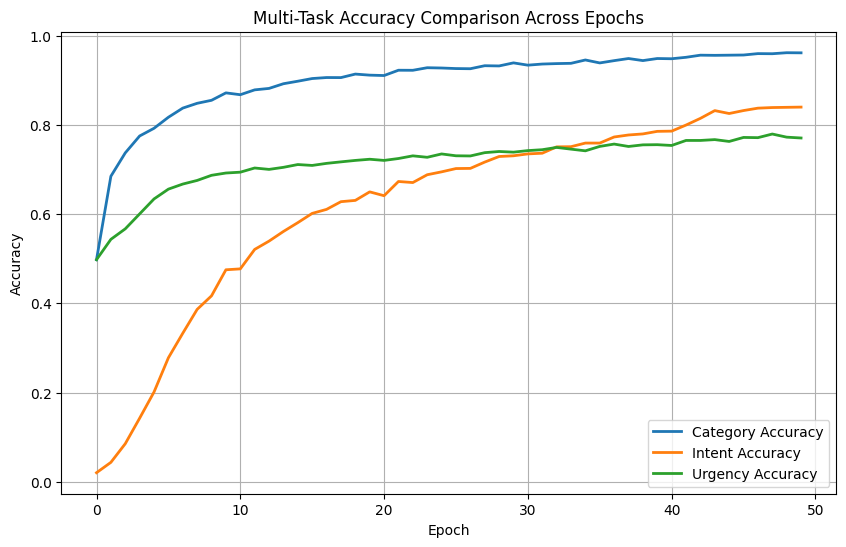

✅ Final Epoch Accuracy per Head:


KeyError: -1

In [ ]:
import matplotlib.pyplot as plt

# Extract metrics from history
category_acc = Final_advanced_history['category_output_accuracy']
intent_acc = Final_advanced_history['intent_output_accuracy']
urgency_acc = Final_advanced_history['urgency_output_accuracy']

# Plot accuracy for each head across epochs
plt.figure(figsize=(10,6))
plt.plot(category_acc, label='Category Accuracy', linewidth=2)
plt.plot(intent_acc, label='Intent Accuracy', linewidth=2)
plt.plot(urgency_acc, label='Urgency Accuracy', linewidth=2)
plt.title('Multi-Task Accuracy Comparison Across Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Print final epoch accuracies
print("✅ Final Epoch Accuracy per Head:")
print(f"Category Accuracy: {category_acc[-1]:.4f}")
print(f"Intent Accuracy:   {intent_acc[-1]:.4f}")
print(f"Urgency Accuracy:  {urgency_acc[-1]:.4f}")

# Optional: check if one head dominates
accuracy_values = [category_acc[-1], intent_acc[-1], urgency_acc[-1]]
max_acc = max(accuracy_values)
min_acc = min(accuracy_values)
print(f"\nAccuracy Gap between best and worst head: {max_acc - min_acc:.4f}")
